# Abstract

This notebook opens up the Favorita dataset, loads it in, gets a few simple dataset metrics (count of products, stores, transaction events), looks at the time range and investigates the effect of the earthquake.

There's no inference and little plotting

# Prelude 

## Configuration

In [6]:
DataSetPath = "/Users/bryanfeeney/Dropbox/OttomanDiviner/datasets/favorita/"

StoresPath   = DataSetPath + "stores.csv.gz"
ItemsPath    = DataSetPath + "items.csv.gz"
OilPricePath = DataSetPath + "oil.csv.gz"
HolidaysPath = DataSetPath + "holidays_events.csv.gz"
Transactions = DataSetPath + "transactions.csv.gz"
TrainData    = DataSetPath + "train.csv.gz"

## Imports 

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# DataSet Exploration 

## Stores 

In [7]:
stores = pd.read_csv(StoresPath, compression="gzip")

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
stores.shape

(54, 5)

In [19]:
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Azuay                              3
Manabi                             3
Santo Domingo de los Tsachilas     3
El Oro                             2
Los Rios                           2
Tungurahua                         2
Cotopaxi                           2
Esmeraldas                         1
Pastaza                            1
Chimborazo                         1
Bolivar                            1
Santa Elena                        1
Imbabura                           1
Loja                               1
Name: state, dtype: int64

In [20]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Santo Domingo     3
Cuenca            3
Latacunga         2
Machala           2
Ambato            2
Manta             2
Playas            1
El Carmen         1
Puyo              1
Ibarra            1
Salinas           1
Riobamba          1
Esmeraldas        1
Babahoyo          1
Libertad          1
Guaranda          1
Cayambe           1
Daule             1
Quevedo           1
Loja              1
Name: city, dtype: int64

In [21]:
stores.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [22]:
stores.cluster.value_counts()

3     7
6     6
10    6
15    5
14    4
13    4
1     3
11    3
8     3
4     3
2     2
9     2
7     2
5     1
16    1
12    1
17    1
Name: cluster, dtype: int64

In [34]:
stores.groupby(['state', 'city']).count()

store_nbr  type  cluster
state                          city                                   
Azuay                          Cuenca                 3     3        3
Bolivar                        Guaranda               1     1        1
Chimborazo                     Riobamba               1     1        1
Cotopaxi                       Latacunga              2     2        2
El Oro                         Machala                2     2        2
Esmeraldas                     Esmeraldas             1     1        1
Guayas                         Daule                  1     1        1
                               Guayaquil              8     8        8
                               Libertad               1     1        1
                               Playas                 1     1        1
Imbabura                       Ibarra                 1     1        1
Loja                           Loja                   1     1        1
Los Rios                       Babahoyo               1     1        1
                               Quevedo                1     1        1
Manabi                         El Carmen              1     1        1
                               Manta                  2     2        2
Pastaza                        Puyo                   1     1        1
Pichincha                      Cayambe                1     1        1
                               Quito                 18    18       18
Santa Elena                    Salinas                1     1        1
Santo Domingo de los Tsachilas Santo Domingo          3     3        3
Tungurahua                     Ambato                 2     2        2

In [36]:
stores.groupby(['city', 'cluster']).count()

store_nbr  state  type
city          cluster                        
Ambato        9                1      1     1
              14               1      1     1
Babahoyo      10               1      1     1
Cayambe       6                1      1     1
Cuenca        2                2      2     2
              6                1      1     1
Daule         1                1      1     1
El Carmen     3                1      1     1
Esmeraldas    10               1      1     1
Guaranda      15               1      1     1
Guayaquil     1                1      1     1
              3                2      2     2
              6                1      1     1
              10               3      3     3
              17               1      1     1
Ibarra        15               1      1     1
Latacunga     15               2      2     2
Libertad      10               1      1     1
Loja          4                1      1     1
Machala       3                1      1     1
              4                1      1     1
Manta         11               1      1     1
              13               1      1     1
Playas        3                1      1     1
Puyo          7                1      1     1
Quevedo       3                1      1     1
Quito         5                1      1     1
              6                2      2     2
              8                3      3     3
              9                1      1     1
              11               2      2     2
              12               1      1     1
              13               3      3     3
              14               3      3     3
              15               1      1     1
              16               1      1     1
Riobamba      7                1      1     1
Salinas       1                1      1     1
Santo Domingo 3                1      1     1
              4                1      1     1
              6                1      1     1

## Items

In [23]:
items = pd.read_csv(ItemsPath, compression='gzip')

In [24]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [25]:
items.shape

(4100, 4)

In [26]:
items.family.value_counts()

GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
AUTOMOTIVE                      20
LINGERIE                        20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES           

In [28]:
items['class'].value_counts()

1016    133
1040    110
1124    100
1034     98
1122     81
1072     70
1032     65
1148     62
1120     61
3020     60
2302     59
1026     54
3106     53
1042     51
1030     51
1028     48
1114     42
3034     41
2006     41
1190     40
4126     40
1074     39
1004     39
1142     37
1126     36
2502     36
2420     36
3046     35
1144     35
2008     34
       ... 
1018      1
6393      1
1336      1
6301      1
1380      1
6022      1
2024      1
4139      1
6230      1
6238      1
4255      1
6322      1
6426      1
2340      1
2412      1
2640      1
2784      1
2864      1
1005      1
1029      1
1041      1
3116      1
1089      1
1153      1
4140      1
2103      1
6233      1
4212      1
4228      1
6155      1
Name: class, Length: 337, dtype: int64

In [29]:
items.perishable.value_counts()

0    3114
1     986
Name: perishable, dtype: int64

In [38]:
items.groupby(['family', 'perishable']).count()

,,item_nbr,class
family,perishable,,
AUTOMOTIVE,0,20,20
BABY CARE,0,1,1
BEAUTY,0,19,19
BEVERAGES,0,613,613
BOOKS,0,1,1
BREAD/BAKERY,1,134,134
CELEBRATION,0,31,31
CLEANING,0,446,446
DAIRY,1,242,242


Perishability is only really for evaluation, we're not doing a whole lot else otherwise

## Oil Price 

In [39]:
oil = pd.read_csv(OilPricePath, compression='gzip')

In [40]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [42]:
[oil.date.min(), oil.date.max()]

['2013-01-01', '2017-08-31']

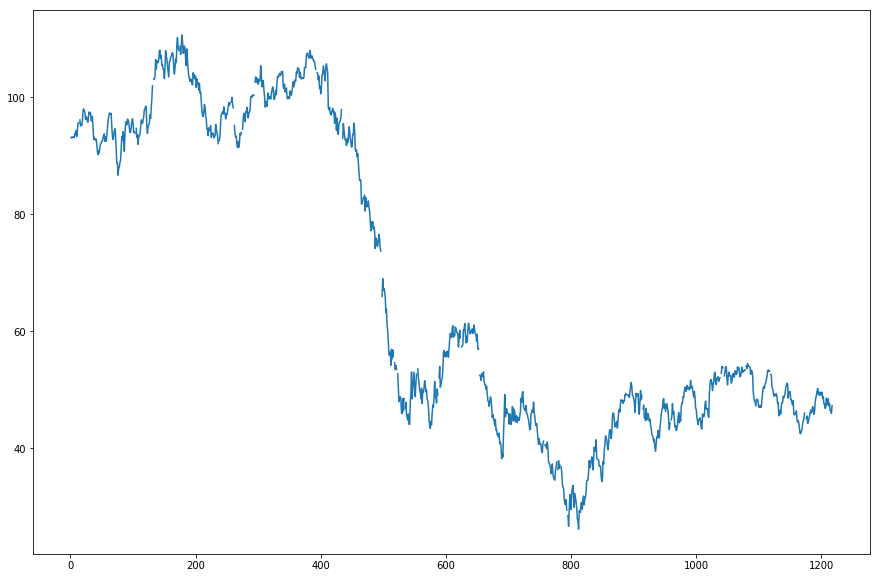

In [53]:
plt.figure(figsize=(15,10))
plt.plot(oil.dcoilwtico)
# oil.plot(y='dcoilwtico', x='date');

## Holidays

In [56]:
holidays = pd.read_csv(HolidaysPath, compression='gzip')

In [57]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [59]:
holidays.transferred.sum(), holidays.shape[0]

(12, 350)

## Transactions

In [60]:
transactions = pd.read_csv(Transactions, compression='gzip')

In [61]:
transactions.shape

(83488, 3)

In [62]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


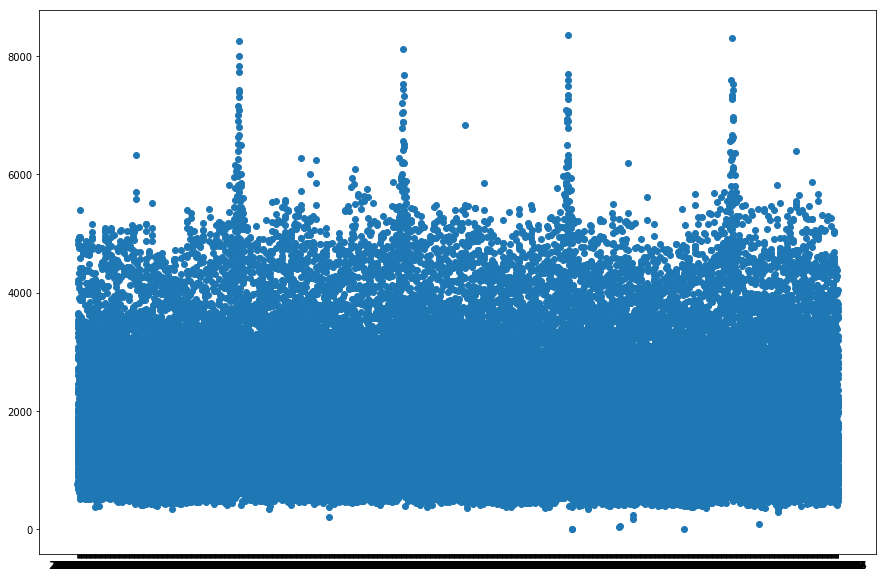

In [72]:
plt.figure(figsize=(15,10))
xs = np.linspace(1, transactions.shape[0], transactions.shape[0])
plt.scatter(transactions.date, transactions.transactions)
plt.

In [81]:
daily_total = transactions.groupby('date')['transactions'].sum()

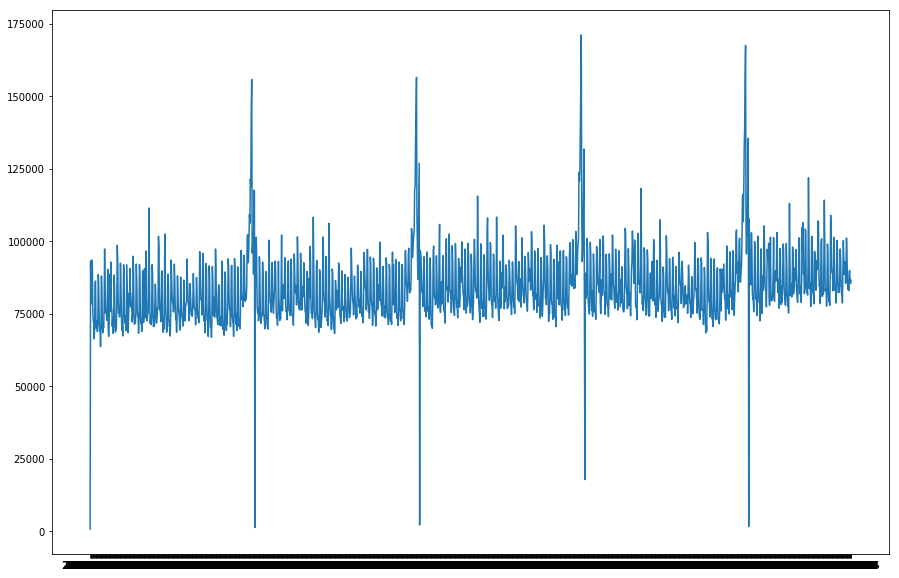

In [94]:
plt.figure(figsize=(15,10))
plt.plot(daily_total)

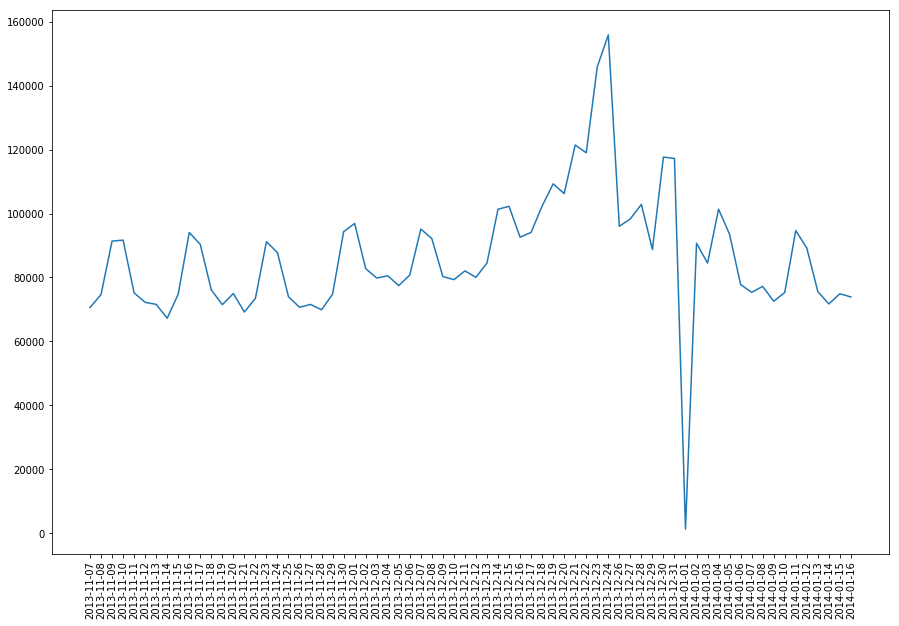

In [97]:
plt.figure(figsize=(15,10))
plt.plot(daily_total[310:380])
plt.xticks(rotation=90)
plt.show();

There is a significant rise before Christmas, and trough on new years day

## Training Data

In [98]:
train = pd.read_csv(TrainData, compression='gzip')

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
train.shape

(125497040, 6)

In [100]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
